In [1]:
import pandas as pd
df = pd.read_csv('c:/data/convenience/temp/df_merge.csv', encoding='ANSI', index_col=0)
df.columns

Index(['개업점포수', '폐업점포수', '총상주인구수', '남성상주인구수', '여성상주인구수', '연령대10상주인구수',
       '연령대20상주인구수', '연령대30상주인구수', '연령대40상주인구수', '연령대50상주인구수', '연령대60이상상주인구수',
       '총가구수', '아파트가구수', '비아파트가구수', '아파트평균시가', '점포수', '유사업종점포수', '개업율', '폐업률',
       '프랜차이즈점포수', '총직장인구수', '남성직장인구수', '여성직장인구수', '연령대10직장인구수', '연령대20직장인구수',
       '연령대30직장인구수', '연령대40직장인구수', '연령대50직장인구수', '연령대60이상직장인구수', '관공서수', '은행수',
       '약국수', '백화점수', '극장수', '숙박시설수', '의료기관', '교육기관', '대중교통', '총유동인구수',
       '남성유동인구수', '여성유동인구수', '연령대10유동인구수', '연령대20유동인구수', '연령대30유동인구수',
       '연령대40유동인구수', '연령대50유동인구수', '연령대60이상유동인구수', '월매출평균', 'cluster'],
      dtype='object')

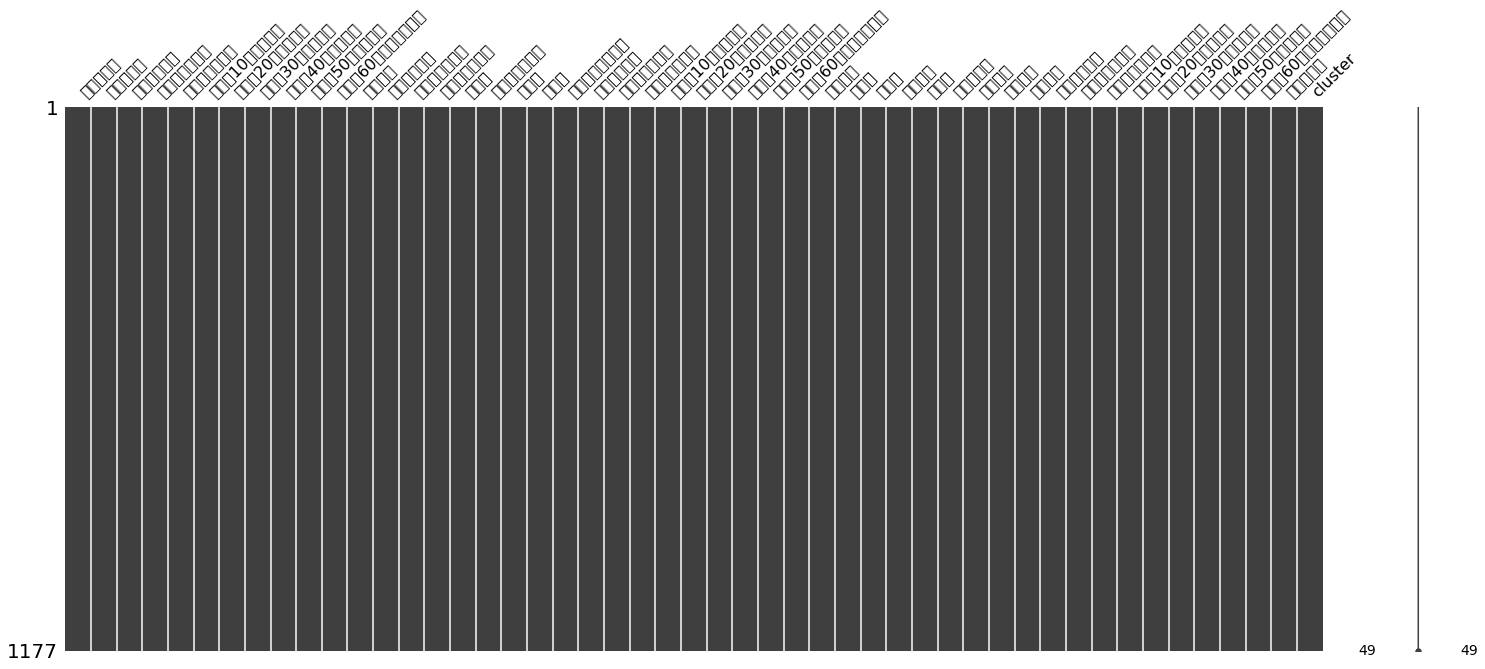

In [2]:
import missingno as msno
#결측값 확인
msno.matrix(df)

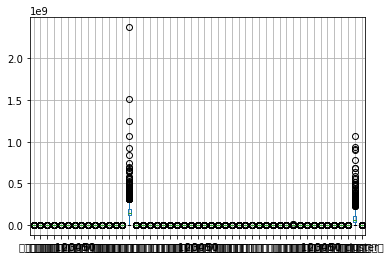

In [3]:
df.boxplot()

In [4]:
#이상치 탐지 및 제거
# from collections import Counter
# import numpy as np
# def detect_outliers(df, n, features):
#     outlier_indices = []
#     for col in features :
#         Q1 = np.percentile(df[col], 25)
#         Q3 = np.percentile(df[col], 75)
#         IQR = Q3 - Q1
#         outlier_step = 1.5 * IQR
#         outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
#         outlier_indices.extend(outlier_list_col)
#     outlier_indices = Counter(outlier_indices)
#     multiple_outliers = list(k for k, v in outlier_indices.items() if v > n) 
#     return multiple_outliers

# Outliers_to_drop = detect_outliers(df, 2, df.columns)
# df.loc[Outliers_to_drop]

# df = df.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

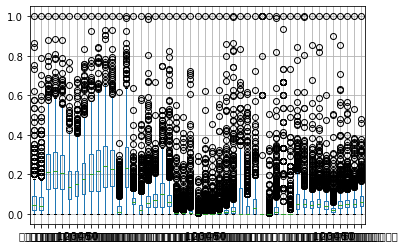

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df.iloc[:,:-2]), columns=df.columns[:-2], index=df.index)
df_scaled.boxplot()

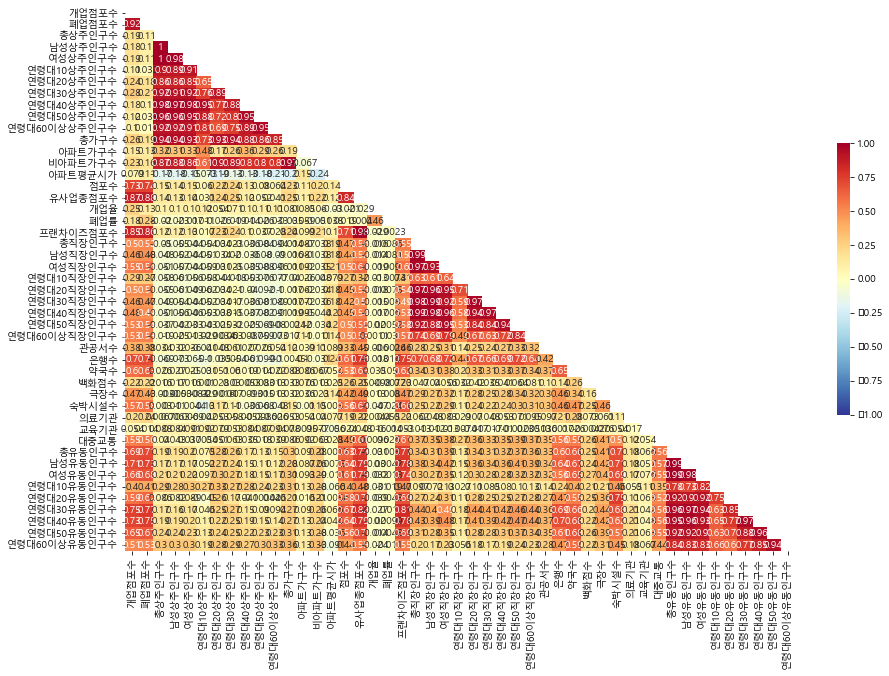

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

plt.figure(figsize=(15,10))
mask = np.zeros_like(df_scaled.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_scaled.corr(), annot=True, mask=mask, cbar_kws={'shrink':.5}, cmap='RdYlBu_r', vmin =-1, vmax=1)
plt.show()

In [7]:
#회귀분석 설명력 확인
import statsmodels.api as sm 
X=df_scaled
y=df['월매출평균']
model=sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  월매출평균   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     7.970
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           8.01e-39
Time:                        16:35:31   Log-Likelihood:                -23266.
No. Observations:                1177   AIC:                         4.661e+04
Df Residuals:                    1136   BIC:                         4.682e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
개업점포수        -2.552e+07   1.09e+08     -0.234   

In [8]:
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features']=X.columns 
vif=vif.sort_values('VIF Factor').reset_index(drop=True)
vif.sort_values(by='VIF Factor', ascending=False).head(10)

,VIF Factor,features
23,inf,남성유동인구수
35,inf,연령대50직장인구수
26,inf,여성상주인구수
27,inf,연령대10상주인구수
28,inf,연령대20상주인구수
29,inf,연령대30상주인구수
30,inf,연령대40상주인구수
31,inf,연령대50상주인구수
32,inf,연령대60이상상주인구수
33,inf,총가구수


In [9]:
cols=['개업점포수','비아파트가구수', '아파트평균시가', '개업율', '총직장인구수', '관공서수', '은행수', '약국수', '백화점수', '극장수', '숙박시설수', '의료기관', '교육기관', '대중교통', '총유동인구수']
X=df_scaled[cols]

In [10]:
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features']=X.columns 
vif=vif.sort_values('VIF Factor').reset_index(drop=True)
vif.sort_values(by='VIF Factor', ascending=False).head(10)

,VIF Factor,features
14,6.586205,총유동인구수
13,5.834729,개업점포수
12,5.151551,은행수
11,3.865092,약국수
10,3.333073,비아파트가구수
9,3.012718,대중교통
8,2.701005,숙박시설수
7,2.515806,개업율
6,2.344734,총직장인구수
5,2.071477,아파트평균시가


In [11]:
import statsmodels.api as sm 
X=df_scaled
y=df['월매출평균']
model=sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  월매출평균   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     7.970
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           8.01e-39
Time:                        16:35:32   Log-Likelihood:                -23266.
No. Observations:                1177   AIC:                         4.661e+04
Df Residuals:                    1136   BIC:                         4.682e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
개업점포수        -2.552e+07   1.09e+08     -0.234   

In [13]:
#월매출 기준 평균 이상 이하 분류 파생변수
import numpy as np
result=[]
for i in df['월매출평균'] : 
    if i > np.mean(df['월매출평균']):
        result.append(1)
    else:
        result.append(0)
df['result'] = result
df_scaled.head()

,개업점포수,폐업점포수,총상주인구수,남성상주인구수,여성상주인구수,연령대10상주인구수,연령대20상주인구수,연령대30상주인구수,연령대40상주인구수,연령대50상주인구수,...,대중교통,총유동인구수,남성유동인구수,여성유동인구수,연령대10유동인구수,연령대20유동인구수,연령대30유동인구수,연령대40유동인구수,연령대50유동인구수,연령대60이상유동인구수
상권코드,,,,,,,,,,,,,,,,,,,,,
1000001,0.066667,0.042553,0.170097,0.164687,0.175103,0.127327,0.087545,0.114814,0.188438,0.168889,...,0.170404,0.034109,0.033047,0.030010,0.029207,0.012026,0.036818,0.037482,0.030413,0.030346
1000002,0.000000,0.000000,0.080345,0.074228,0.086006,0.009244,0.166503,0.109029,0.044276,0.029595,...,0.022422,0.070281,0.065862,0.064215,0.043307,0.023223,0.058475,0.058993,0.071131,0.120532
1000003,0.177778,0.085106,0.109281,0.130092,0.090026,0.050537,0.067669,0.083558,0.115428,0.124496,...,0.096413,0.022279,0.023122,0.017965,0.006447,0.009785,0.021488,0.022568,0.021930,0.025228
1000004,0.222222,0.127660,0.134230,0.138989,0.129827,0.077333,0.186989,0.086914,0.093749,0.098055,...,0.179372,0.059004,0.052179,0.057230,0.072271,0.062032,0.026782,0.027853,0.025752,0.038546
1000005,0.088889,0.021277,0.166067,0.168422,0.163888,0.124809,0.104329,0.116783,0.176847,0.185633,...,0.067265,0.010250,0.008431,0.010618,0.011525,0.003817,0.006351,0.008215,0.008704,0.018004


In [14]:
#분류분석 설명력 확인
import statsmodels.api as sm
X=df_scaled[cols]
y=df['result']
model=sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.481837
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 result   No. Observations:                 1177
Model:                          Logit   Df Residuals:                     1162
Method:                           MLE   Df Model:                           14
Date:                Mon, 14 Dec 2020   Pseudo R-squ.:                  0.2324
Time:                        16:35:43   Log-Likelihood:                -567.12
converged:                       True   LL-Null:                       -738.85
Covariance Type:            nonrobust   LLR p-value:                 9.721e-65
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
개업점포수        -36.6767      3.233    -11.343      0.000     -43.014     -30.340
비아파트가구수        0.4303      0.